#### **Task 2(a): Take a grayscale image of size 512x512, perform the brightness enhancement of a specific range of gray levels & observe its result**

#### Import The Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### Loading the Original Image

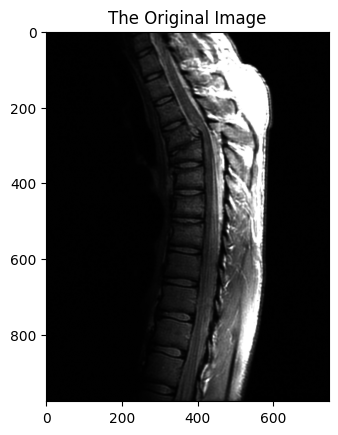

In [2]:
original_image = cv2.imread("./Fractured Spine 746x976.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(original_image, cmap = 'gray')
plt.title("The Original Image")
plt.show()

#### Enhancing Brightness of a specific range of Gray Levels

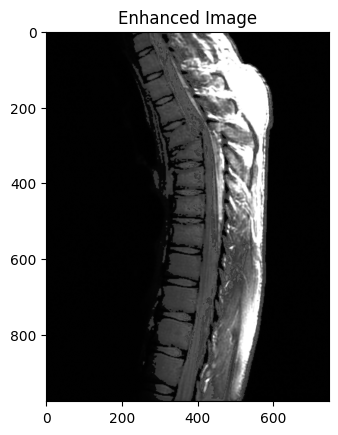

In [3]:
range_start, range_end, extra_brightness = 10, 50, 40
height, width = original_image.shape
image = original_image

for r in range(height):
    for c in range(width):
        if(image[r,c] >= range_start and image[r,c] <= range_end):
            image[r,c] +=extra_brightness
        np.clip(image, 0, 255)

plt.imshow(image, cmap = 'gray')
plt.title("Enhanced Image")
plt.show()

#### **Task 2(b): Take a grayscale image of size 512x512, differentiate the results of power law & inverse logarithmic transformation**

##### Function for Power Law Transformation

In [4]:
def power_law_transformation(image, gamma):
    transformed_image = image.copy()
    height, width = image.shape

    for r in range(height):
        for c in range(width):
            pixel = float(image[r,c]) / 255.0
            transformed_image[r,c] = (pixel ** gamma) * 255

    return np.uint8(transformed_image)

##### Function for Inverse Logarithmic Transformation

In [5]:
def inverse_log_transformation(image):
    c = 255 / np.log(256)
    transformed_image = np.exp(image / c) - 1

    return np.uint8(transformed_image)

##### Applying Power Law Transformation (γ < 1)

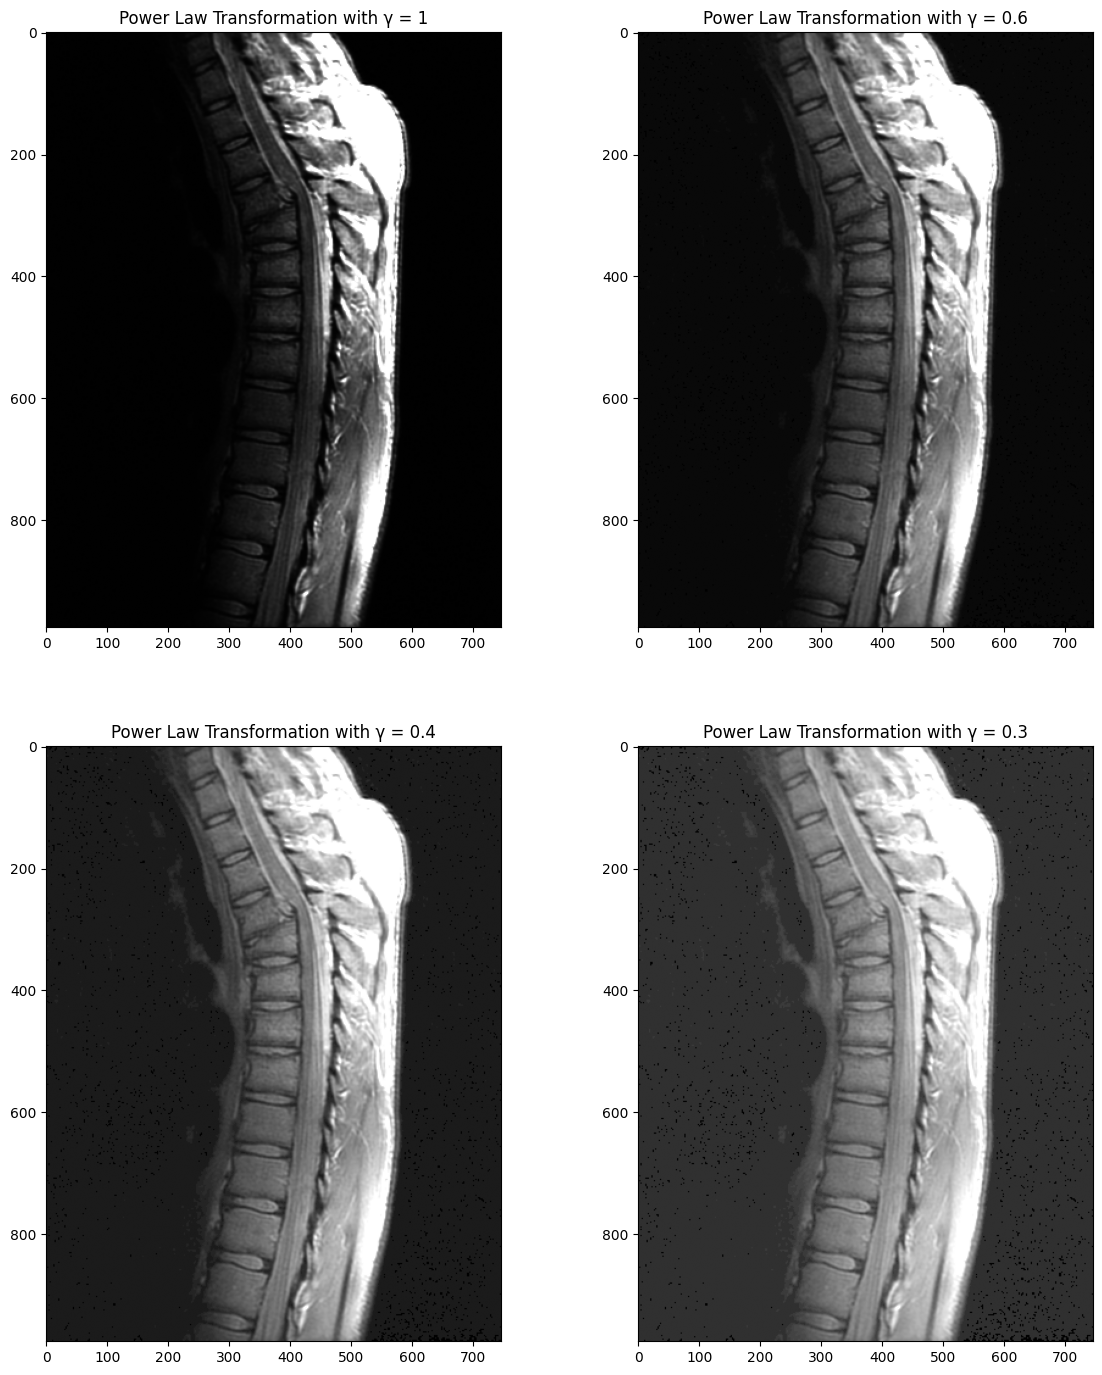

In [7]:
spine_image = cv2.imread("./Fractured Spine 746x976.tif", cv2.IMREAD_GRAYSCALE)
gammas, subplot_number = [1, 0.6, 0.4, 0.3], 1
plt.figure(figsize = (14, 17))

for gamma in (gammas):
    transformed_image = power_law_transformation(spine_image, gamma)
    plt.subplot(2, 2, subplot_number)
    plt.imshow(transformed_image, cmap='gray')
    plt.title(f"Power Law Transformation with γ = {gamma}")
    subplot_number += 1

plt.show()

##### Power Law Transformation (γ > 1)

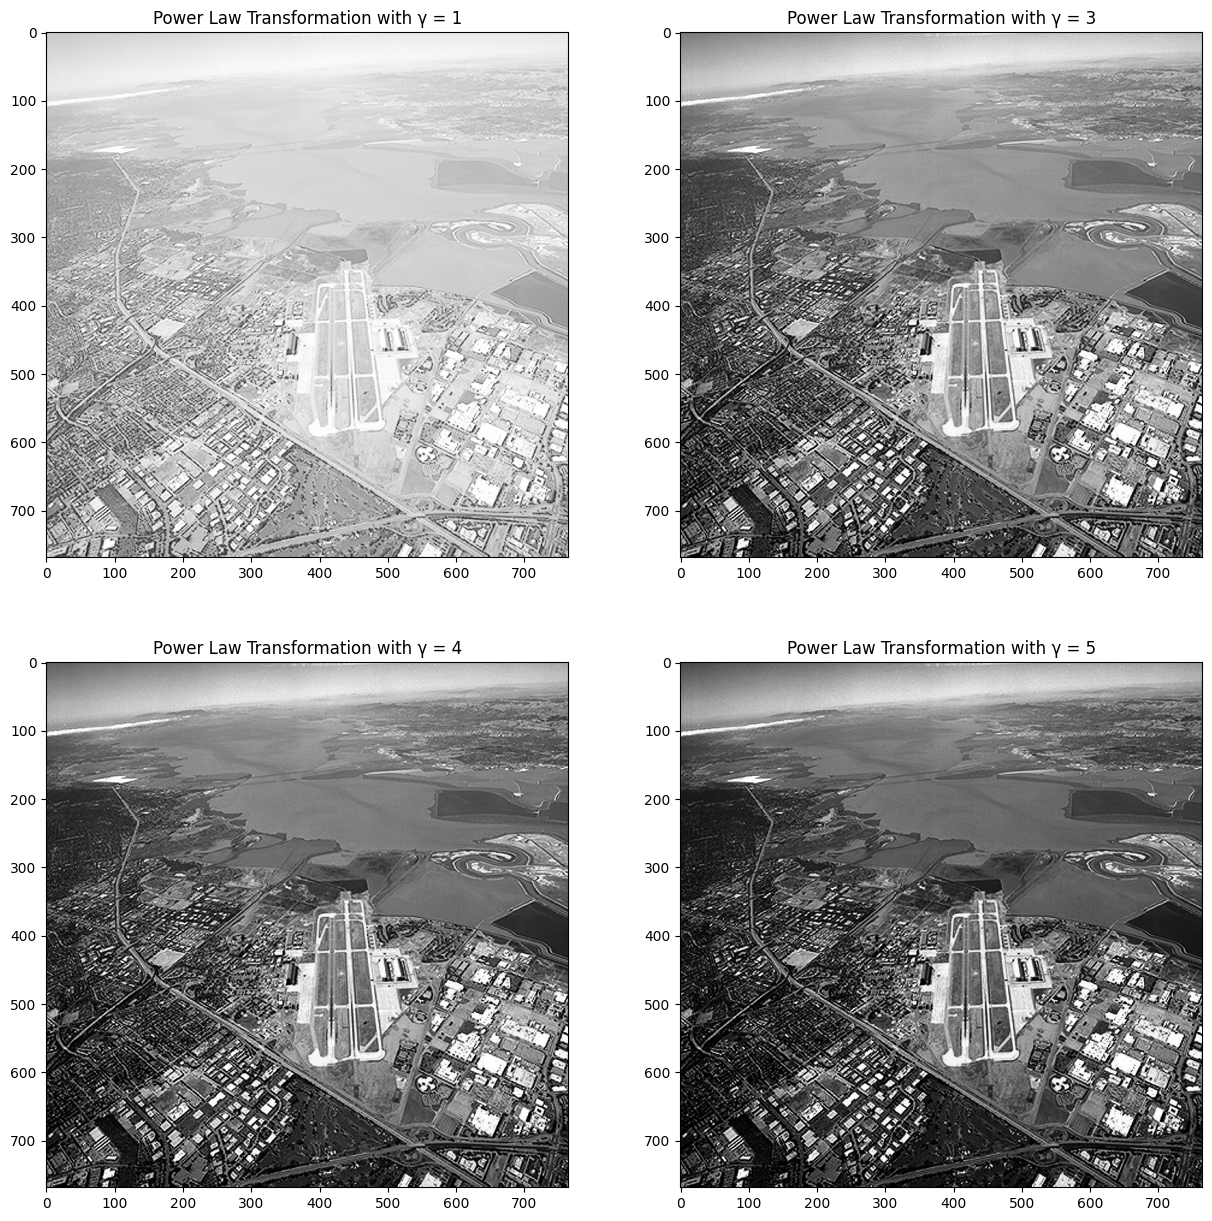

In [8]:
arial_image = cv2.imread("./Aerial Image 765x769.tif", 0)
gammas = [1, 3, 4, 5]
subplot_number = 1
plt.figure(figsize = (15, 15))

for gamma in (gammas):
    transformed_image = power_law_transformation(arial_image, gamma)
    plt.subplot(2, 2, subplot_number)
    plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Power Law Transformation with γ = {gamma}")
    subplot_number += 1

plt.show()

##### Inverse Log Transformation

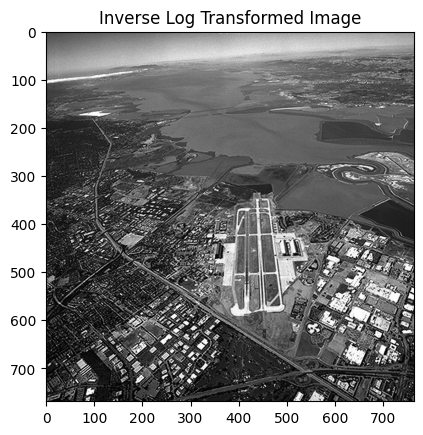

In [10]:
transformed_image = inverse_log_transformation(arial_image)
plt.imshow(transformed_image, cmap = 'gray')
plt.title("Inverse Log Transformed Image")
plt.show()

#### **Task 2(c): Take a grayscale image of size 512x512, find the difference image between the original & the image obtained by last three MSBs**

##### Loading the Original Image

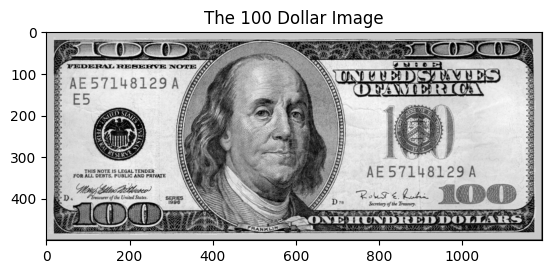

In [11]:
dollar_image = cv2.imread("./Dollar 1192x500.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(dollar_image, cmap='gray')
plt.title("The 100 Dollar Image")
plt.show()

##### Image obtained by Last 3-Bits (MSBs)

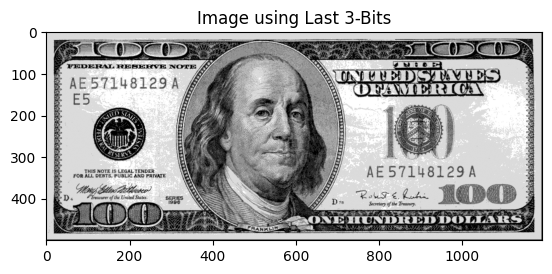

In [12]:
mask = "11100000"
three_bit_image = dollar_image & int(mask, 2)
plt.imshow(three_bit_image, cmap = 'gray')
plt.title("Image using Last 3-Bits")
plt.show()

##### Finding the Difference Image

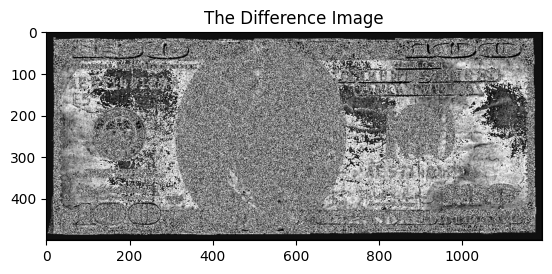

In [13]:
difference_image = cv2.absdiff(np.array(dollar_image), np.array(three_bit_image))
plt.imshow(difference_image, cmap = 'gray')
plt.title("The Difference Image")
plt.show()